In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import geopandas as gpd

from urllib import request
from geotext import GeoText

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut

from shapely.geometry import Point, Polygon
import descartes

import warnings
warnings.filterwarnings('ignore')

In [5]:
## this is where we grab the raw .txt file from gutenberg

url = "http://www.gutenberg.org/files/3176/3176-0.txt"
response = request.urlopen(url)
raw = response.read().35
print(f'{type(raw)}, \n{len(raw)}, \n{raw[:501]}')

<class 'str'>, 
1145397, 
﻿Project Gutenberg's The Innocents Abroad, by Mark Twain (Samuel Clemens)

This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.net


Title: The Innocents Abroad

Author: Mark Twain (Samuel Clemens)

Release Date: August 18, 2006 [EBook #3176]
Last Updated: February 23, 2018

Language: English


In [6]:
type(response)

http.client.HTTPResponse

In [4]:
## parses the text for geographic entities

places = GeoText(raw)
cities = list(places.cities)
cities

['Tangier',
 'Paris',
 'Temple',
 'Como',
 'Garibaldi',
 'Rome',
 'Roman',
 'Naples',
 'Naples',
 'Bay',
 'Smyrna',
 'Ferguson',
 'Jacksonville',
 'Jericho',
 'Fountain',
 'Paradise',
 'Damascus',
 'George',
 'Pen',
 'Palestine',
 'Tiberias',
 'Nazareth',
 'Godfrey',
 'David',
 'Jericho',
 'Bethany',
 'March',
 'Palestine',
 'Holiday',
 'San Francisco',
 'New York',
 'New York',
 'York',
 'Paris',
 'Genoa',
 'Genoa',
 'Columbus',
 'Verona',
 'Venice',
 'Parma',
 'Correggio',
 'Bologna',
 'Florence',
 'Florence',
 'Pisa',
 'Lucca',
 'Roman',
 'Florence',
 'Naples',
 'Rome',
 'Garibaldi',
 'Rome',
 'Naples',
 'Palermo',
 'Naples',
 'Athens',
 'Messina',
 'Piraeus',
 'Athens',
 'Bay',
 'Corinth',
 'Athens',
 'Balaklava',
 'Troy',
 'Asia',
 'Smyrna',
 'Asia',
 'Beirut',
 'Damascus',
 'Jerusalem',
 'Tiberias',
 'Nazareth',
 'Bethany',
 'Bethlehem',
 'Beirut',
 'Damascus',
 'Tiberias',
 'Alexandria',
 'Alexandria',
 'Cairo',
 'Memphis',
 'Cagliari',
 'Palma',
 'Parma',
 'Valencia',
 'Duncan'

In [5]:
## Nominatum searches Open Street Map data

geolocator = Nominatim(timeout=2)

geolocator = Nominatim()
lat_lon = []
for city in cities: 
    try:
        location = geolocator.geocode(city)
        if location:
            print(location.latitude, location.longitude)
            lat_lon.append(location)
    except GeocoderTimedOut as e:
        print("Error: geocode failed on input %s with message %s"%(city, e))
lat_lon

35.7642313 -5.81862599789511
48.8566101 2.3514992
31.098207 -97.3427847
45.9394759 9.14941014540895
-29.2562253 -51.5269167
41.894802 12.4853384
49.67887 4.31419
40.8359336 14.2487826
40.8359336 14.2487826
60.9838761 25.6561814
38.4147331 27.1434119
38.744707 -90.3038975
30.3321838 -81.655651
31.855987 35.4598851
38.56798585 -104.65261282982
36.1150858 -115.1734142
33.5130695 36.3095814
51.50415415 -0.0899376391813022
18.6973659 73.1367204683128
30.8760272 35.0015196
32.7938522 35.5328566
32.7066301 35.3048161
38.9556031 -90.1867765
47.0385725 26.6682689475117
31.855987 35.4598851
38.0984033 -85.8721856
50.2051313 16.8493842
30.8760272 35.0015196
28.187755 -82.7416080707393
37.7792808 -122.4192363
40.7127281 -74.0060152
40.7127281 -74.0060152
53.9590555 -1.0815361
48.8566101 2.3514992
44.40726 8.9338624
44.40726 8.9338624
39.9622601 -83.0007065
45.4384958 10.9924122
45.4371908 12.3345898
44.8013678 10.3280833
44.770561 10.7797829
44.4936714 11.3430347
43.7698712 11.2555757
43.7698712 1

45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
40.8825914 40.2751769378287
45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
40.8825914 40.2751769378287
45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
31.199004 29.894378
Error: geocode failed on input Venice with message Service timed out
45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
-29.6860512 -53.8069214
34.1064001 -117.3703235
45.4371908 12.3345898
51.50415415 -0.0899376391813022
37.1960735 -101.8099541
42.3602534 -71.0582912
48.8566101 2.3514992
48.8566101 2.3514992
Error: geocode failed on input Venice with message Service timed out
-29.6860512 -53.8069214
45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
45.4371908 12.3345898
39.5695818 2.6500745
45.4371908 12.3345898
Error: geocode failed on input David with me

38.4147331 27.1434119
39.9530516 44.801806075
38.4147331 27.1434119
38.4147331 27.1434119
31.098207 -97.3427847
38.0171441 -122.2885808
33.9597677 -83.376398
39.7082498 -91.3587413
41.8455878 -87.7539448
48.753554 2.2959423
41.894802 12.4853384
43.7159395 10.4018624
43.0833231 -73.8712155
38.4147331 27.1434119
30.8760272 35.0015196
33.5130695 36.3095814
30.8760272 35.0015196
30.8760272 35.0015196
31.199004 29.894378
33.5130695 36.3095814
Error: geocode failed on input Damascus with message Service timed out
38.4147331 27.1434119
33.5130695 36.3095814
32.7938522 35.5328566
41.894802 12.4853384
33.2721211 35.1964023
31.098207 -97.3427847
30.3321838 -81.655651
Error: geocode failed on input Jericho with message Service timed out
27.7198095 56.335807
40.8825914 40.2751769378287
40.8825914 40.2751769378287
31.855987 35.4598851
48.8566101 2.3514992
31.098207 -97.3427847
31.098207 -97.3427847
26.9260832 -80.1210891406095
26.9260832 -80.1210891406095
33.5130695 36.3095814
33.5130695 36.3095814

41.894802 12.4853384
31.855987 35.4598851
31.778345 35.2250786
31.855987 35.4598851
31.778345 35.2250786
31.855987 35.4598851
31.778345 35.2250786
38.0984033 -85.8721856
38.0984033 -85.8721856
31.778345 35.2250786
Error: geocode failed on input Fountain with message Service timed out
37.1302916 62.4019513
31.778345 35.2250786
30.8760272 35.0015196
30.8760272 35.0015196
31.778345 35.2250786
Error: geocode failed on input Jerusalem with message Service timed out
32.7066301 35.3048161
32.7938522 35.5328566
41.9741672 2.7949886
53.9590555 -1.0815361
30.8760272 35.0015196
30.8760272 35.0015196
30.8760272 35.0015196
30.8760272 35.0015196
30.8760272 35.0015196
31.7043556 35.2061876
Error: geocode failed on input Bethlehem with message Service timed out
46.592712 -112.036109
30.8760272 35.0015196
30.8760272 35.0015196
37.1302916 62.4019513
31.7043556 35.2061876
31.778345 35.2250786
31.7043556 35.2061876
30.8760272 35.0015196
31.778345 35.2250786
33.5130695 36.3095814
31.778345 35.2250786
Error

[Location(Tanger طنجة, pachalik de Tanger طنجة, Préfecture de Tanger-Assilah عمالة طنجة-أصيلة, Tanger-Tétouan-Al Hoceima ⵟⴰⵏⵊ-ⵟⵉⵜⴰⵡⵉⵏ-ⵍⵃⵓⵙⵉⵎⴰ طنجة-تطوان-الحسيمة, Maroc ⵍⵎⵖⵔⵉⴱ المغرب, (35.7642313, -5.81862599789511, 0.0)),
 Location(Paris, Île-de-France, France métropolitaine, France, (48.8566101, 2.3514992, 0.0)),
 Location(Temple, Bell County, Texas, United States of America, (31.098207, -97.3427847, 0.0)),
 Location(Como, Lombardia, Italia, (45.9394759, 9.14941014540895, 0.0)),
 Location(Garibaldi, Região Geográfica Imediata de Bento Gonçalves, Região Geográfica Intermediária de Caxias do Sul, Rio Grande do Sul, Região Sul, 95720-000, Brasil, (-29.2562253, -51.5269167, 0.0)),
 Location(Roma, Roma Capitale, Lazio, Italia, (41.894802, 12.4853384, 0.0)),
 Location(La Romagne, Rethel, Ardennes, Grand Est, France métropolitaine, 08220, France, (49.67887, 4.31419, 0.0)),
 Location(Napoli, Campania, Italia, (40.8359336, 14.2487826, 0.0)),
 Location(Napoli, Campania, Italia, (40.8359336, 14.

In [6]:
df = pd.DataFrame(lat_lon, columns=['City Name', 'Coordinates'])
df.head(7)

,City Name,Coordinates
0,"Tanger طنجة, pachalik de Tanger طنجة, Préfectu...","(35.7642313, -5.81862599789511)"
1,"Paris, Île-de-France, France métropolitaine, F...","(48.8566101, 2.3514992)"
2,"Temple, Bell County, Texas, United States of A...","(31.098207, -97.3427847)"
3,"Como, Lombardia, Italia","(45.9394759, 9.14941014540895)"
4,"Garibaldi, Região Geográfica Imediata de Bento...","(-29.2562253, -51.5269167)"
5,"Roma, Roma Capitale, Lazio, Italia","(41.894802, 12.4853384)"
6,"La Romagne, Rethel, Ardennes, Grand Est, Franc...","(49.67887, 4.31419)"


In [7]:
## turn cordinates into point objects with shapely
## i'm switching latitute and longitude positions because 
## the map I download does that for some reason

geometry = [Point(x[1], x[0]) for x in df['Coordinates']]
geometry[:7]

In [8]:
## coordinate system I'm using
crs = {'init': 'epsg:4326'}

## convert df to geo df
geo_df = gpd.GeoDataFrame(df, crs=crs, geometry=geometry)
geo_df.head(7)

,City Name,Coordinates,geometry
0,"Tanger طنجة, pachalik de Tanger طنجة, Préfectu...","(35.7642313, -5.81862599789511)",POINT (-5.81863 35.76423)
1,"Paris, Île-de-France, France métropolitaine, F...","(48.8566101, 2.3514992)",POINT (2.35150 48.85661)
2,"Temple, Bell County, Texas, United States of A...","(31.098207, -97.3427847)",POINT (-97.34278 31.09821)
3,"Como, Lombardia, Italia","(45.9394759, 9.14941014540895)",POINT (9.14941 45.93948)
4,"Garibaldi, Região Geográfica Imediata de Bento...","(-29.2562253, -51.5269167)",POINT (-51.52692 -29.25623)
5,"Roma, Roma Capitale, Lazio, Italia","(41.894802, 12.4853384)",POINT (12.48534 41.89480)
6,"La Romagne, Rethel, Ardennes, Grand Est, Franc...","(49.67887, 4.31419)",POINT (4.31419 49.67887)


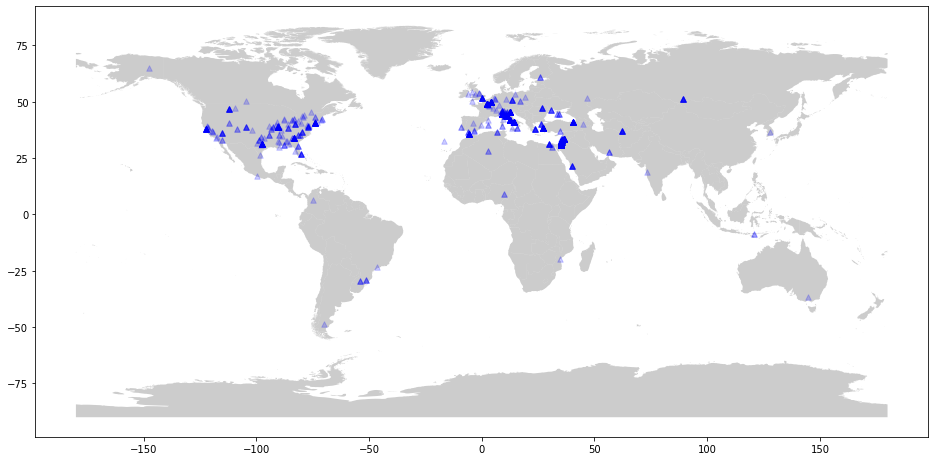

In [9]:
## world map .shp file I downloaded
countries_map = gpd.read_file('Countries_WGS84/Countries_WGS84.shp')

f, ax = plt.subplots(figsize=(16, 16))
countries_map.plot(ax=ax, alpha=0.4, color='grey')
geo_df['geometry'].plot(ax=ax, markersize = 30, color = 'b', marker = '^', alpha=.2)